In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm
import numpy as np 

# Part I: Logistic Regression Model

In [2]:
# A.
# Import the dataset 
IBM =pd.read_csv('IBM.csv')
IBM.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [3]:
IBM.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [4]:
IBM.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [5]:
IBM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


B: Numeric variables: 'Age', 'DistanceFromHome',  'MonthlyIncome', 'NumCompaniesWorked', 'YearsAtCompany'

Categorical variables: 'Attrition', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MaritalStatus', 'WorkLifeBalance'

In [6]:
IBM.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

C-a: 
There are only two outcome classes. The "Yes" class indicates that the employee has left the company, and the "No" class indicates that the employee still remains with the company. Out of all the records, 1233 employees (83.9%) are classified as "No," indicating that they still remain in the company, while 237 employees (16.1%) are classified as "Yes," meaning they have left the company.

C-b: 
Oversampling is a technique used to address class imbalance in a dataset. Class imbalance stands for a situation where the classes in the target variable are not represented in a balanced way, and one class has significantly fewer instances than the others, which can lead to biased model performance. Oversampling involves artificially increasing the number of instances in the minority class by replicating or generating new samples. This helps to balance the representation of different classes and prevent the model from being biased towards the majority class, thus leading to better performance.

In [7]:
# D.
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(IBM['Attrition'])
IBM['Attrition'] = label_encoder.transform(IBM['Attrition'])

# Check the updated DataFrame
print(IBM['Attrition'])

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32


In [8]:
# E. 
missing_values = IBM.isnull().sum()
missing_values

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

E. 
There is NO missing values

E-a. 
The process of imputing missing values relies on assumptions made about the existing data. However, using arbitrary or estimated values for imputation can introduce bias and distort the true underlying patterns in the data. Consequently, this can lead to biased results and inaccurate conclusions.

Furthermore, imputation methods typically estimate missing values based on the available data, resulting in a reduction in the dispersion of the treated variable. By adding more data points around the center, the imputed variable tends to have a lower standard deviation and variance compared to the original, untreated version. This reduction in variability can have implications for subsequent analyses and modeling, as the imputed values may not accurately represent the actual range and distribution of the variable.

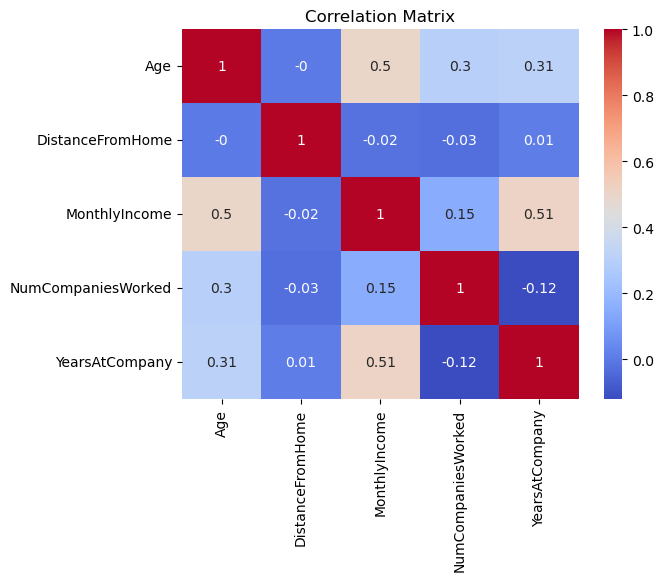

In [9]:
# F-a.
# Build a correlation matrix
selected_vars = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'YearsAtCompany']
subset_df = IBM[selected_vars]
correlation_matrix = subset_df.corr().round(2)

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

F-a-i:
A commonly used guideline suggests that a correlation coefficient greater than 0.7 (or sometimes 0.8) indicates a strong correlation that could potentially contribute to multicollinearity. Since there is no multicollinearity can be identified from the above matrix following the rule mentioned, there is no need to remove any variables.

In [10]:
# G.
# Dummify selected variables
IBM_dummies = pd.get_dummies(IBM, drop_first=True, columns=['Department', 'Education','EducationField','EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'MaritalStatus']) 

In [11]:
IBM_dummies

,Age,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany,Department_Research & Development,Department_Sales,Education_2,Education_3,...,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,5993,8,6,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,49,0,8,5130,1,10,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
2,37,1,2,2090,6,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,1
3,33,0,3,2909,1,8,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
4,27,0,2,3468,9,2,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,2571,4,5,1,0,1,0,...,1,0,0,0,1,0,1,0,1,0
1466,39,0,6,9991,4,7,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1467,27,0,4,6142,1,6,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1468,49,0,2,5390,2,9,0,1,0,1,...,0,1,1,0,0,1,0,0,1,0


In [12]:
# H.
# Create a data partition, make 40%/60% split for test and training sets
X = IBM_dummies[['Age', 'DistanceFromHome', 'EnvironmentSatisfaction_2',
       'EnvironmentSatisfaction_3', 'EnvironmentSatisfaction_4',
       'JobSatisfaction_2', 'JobSatisfaction_3', 'JobSatisfaction_4', 'MonthlyIncome', 'NumCompaniesWorked',
       'YearsAtCompany', 'Department_Research & Development',
       'Department_Sales', 'Education_2', 'Education_3', 'Education_4',
       'Education_5', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'WorkLifeBalance_2', 'WorkLifeBalance_3', 'WorkLifeBalance_4',
       'MaritalStatus_Married', 'MaritalStatus_Single']]
y=IBM_dummies[['Attrition']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=829)

In [13]:
print(X_train.shape, X_test.shape, type(X_train), type(X_test))
print(y_train.shape, y_test.shape, type(y_train), type(y_test))

(882, 27) (588, 27) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(882, 1) (588, 1) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


H-a.
I picked 829 as my seed value because Aug 29 is my birthday. 

In [14]:
# I.
# Compare the mean values of the variables in the dataset after grouping by 'Attrition'
IBM_dummies.groupby('Attrition').mean()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,...,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,MaritalStatus_Married,MaritalStatus_Single
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,8.915653,6832.739659,2.645580,7.369019,0.671533,0.287105,0.193025,0.383617,0.275750,...,0.317113,0.313058,0.189781,0.299270,0.330089,0.231955,0.621249,0.102190,0.477697,0.283861
1,33.607595,10.632911,4787.092827,2.940928,5.130802,0.561181,0.388186,0.185654,0.417722,0.244726,...,0.261603,0.253165,0.194093,0.308017,0.219409,0.244726,0.535865,0.113924,0.354430,0.506329


I-a.
MonthlyIncome: This variable appears to have a strong impact on the outcome. The mean values of this variable are significantly higher under class "0" compared to class "1" (6832.74 vs 4787.09). It is likely that employees with higher salaries are more inclined to stay at IBM as they feel satisfied about the treatment, and vice versa.

YearsAtCompany: This variable could also have an impact on the outcome. The mean values of this variable are higher under class "0" compared to class "1" (7 vs 5). It is likely that employees who have spent more years with IBM are less likely to leave due to their familiarity with the company culture and loyalty, and vice versa.

NumCompaniesWorked: It seems that the number of companies employees have previously worked for does not have a significant impact, as the mean values for both classes are very close (with only a 0.3 difference). There may be several other factors influencing the outcome, such as salaries, distance) rather than the number of companies served. Employees who may have had less stability in their previous experiences can still contribute stably at IBM if the company culture aligns with their preferences and values.

# Iteration #1

In [15]:
# J.
# Run logistic regression
logit_model=sm.Logit(y_train, sm.add_constant(X_train))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.371631
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  882
Model:                          Logit   Df Residuals:                      854
Method:                           MLE   Df Model:                           27
Date:                Fri, 16 Jun 2023   Pseudo R-squ.:                  0.1818
Time:                        16:14:49   Log-Likelihood:                -327.78
converged:                       True   LL-Null:                       -400.60
Covariance Type:            nonrobust   LLR p-value:                 3.164e-18
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 1.3351      0.925      1

K-a. 
Numeric variables showing high p-values: YearsAtCompany

K-b. 
Categorical variables showing high p-values for ALL of the levels: Department, Education, EducationField

# Iteration 2

In [16]:
# L.
# Drop high pvalue variables and run logistic regression again 
X_train2 = X_train.drop(['YearsAtCompany', 'Department_Research & Development', 'Department_Sales', 'Education_2','Education_3','Education_4','Education_5','EducationField_Life Sciences','EducationField_Marketing','EducationField_Medical','EducationField_Other','EducationField_Technical Degree'], axis=1)
logit_model = sm.Logit(y_train, sm.add_constant(X_train2))
result2 = logit_model.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.385194
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  882
Model:                          Logit   Df Residuals:                      866
Method:                           MLE   Df Model:                           15
Date:                Fri, 16 Jun 2023   Pseudo R-squ.:                  0.1519
Time:                        16:14:49   Log-Likelihood:                -339.74
converged:                       True   LL-Null:                       -400.60
Covariance Type:            nonrobust   LLR p-value:                 8.794e-19
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.9051      0.629      1.439      0.150      -0.

In [17]:
X_train2

,Age,DistanceFromHome,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,MaritalStatus_Married,MaritalStatus_Single
260,32,7,1,0,0,1,0,0,2794,1,0,0,0,1,0
1294,41,5,1,0,0,1,0,0,6870,3,0,0,0,0,1
544,47,3,0,0,1,0,1,0,13770,9,1,0,0,0,0
1232,35,27,0,0,1,0,1,0,6883,2,0,1,0,1,0
1117,34,1,1,0,0,0,0,1,5484,9,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,46,3,0,0,0,0,1,0,17465,3,0,1,0,1,0
1407,24,1,1,0,0,0,1,0,4617,1,1,0,0,0,1
774,55,2,0,1,0,0,0,0,16756,7,0,0,1,0,1
1312,31,18,0,0,1,0,0,0,2956,0,0,1,0,1,0


LLR p-value is smaller for the second model comparing to the first model (8.794e-19 < 3.164e-18)

In [18]:
# M.
# Using scikit-learn 
logmodel = LogisticRegression()
logmodel.fit(X_train2, y_train)
LogisticRegression()

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
# N
# Make predictions and assess the performance against the train set
from sklearn.metrics import accuracy_score
predictions1 = logmodel.predict(X_train2)
accuracy = accuracy_score(y_train, predictions1)
print("Accuracy against the train set:", accuracy)

Accuracy against the train set: 0.8356009070294784


In [20]:
# Make predictions and assess the performance against the test set
X_test2 = X_test.drop(['YearsAtCompany', 'Department_Research & Development', 'Department_Sales', 'Education_2','Education_3','Education_4','Education_5','EducationField_Life Sciences','EducationField_Marketing','EducationField_Medical','EducationField_Other','EducationField_Technical Degree'], axis=1)
predictions2 = logmodel.predict(X_test2)
accuracy = accuracy_score(y_test, predictions2)
print("Accuracy against the test set:", accuracy)

Accuracy against the test set: 0.8537414965986394


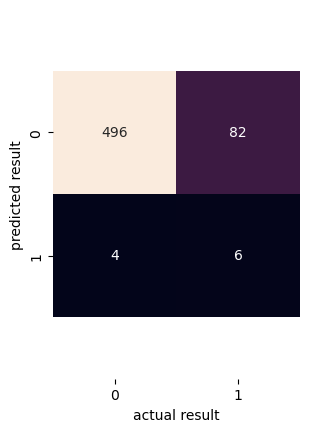

In [21]:
# N.
# Build confusion matrix for test dataset
mat2=confusion_matrix(predictions2, y_test)
sns.heatmap(mat2, square=True, fmt = 'g', annot=True, cbar=False)
plt.xlabel('actual result')
plt.ylabel('predicted result')
a,b = plt.ylim()
a+=.5
b-=.5
plt.ylim(a,b)
plt.show()

In [22]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, balanced_accuracy_score
# N.
# Assess the performance of your model against the test set with more metrics
accuracy = round(accuracy_score(y_test, predictions2), 3)

# Calculate sensitivity (recall)
sensitivity = round(recall_score(y_test, predictions2), 3)

# Calculate specificity
specificity = round(recall_score(y_test, predictions2, pos_label=0), 3)

# Calculate precision
precision = round(precision_score(y_test, predictions2), 3)

# Calculate balanced accuracy
balanced_accuracy = round(balanced_accuracy_score(y_test, predictions2), 3)

print('Answering N-a,b,c,d,e:')
print("Accuracy rate is", accuracy)
print("Sensitivity rate is", sensitivity)
print("Specificity rate is", specificity)
print("Precision rate is", precision)
print("Balanced Accuracy rate is", balanced_accuracy)

Answering N-a,b,c,d,e:
Accuracy rate is 0.854
Sensitivity rate is 0.068
Specificity rate is 0.992
Precision rate is 0.6
Balanced Accuracy rate is 0.53


In [23]:
# O.
# Compare your model’s accuracy against the training set vs. accuracy against the
accuracy = accuracy_score(y_train, predictions1)
print("Accuracy against the train set:", accuracy)
accuracy = accuracy_score(y_test, predictions2)
print("Accuracy against the test set:", accuracy)

Accuracy against the train set: 0.8356009070294784
Accuracy against the test set: 0.8537414965986394


O-a.
The purpose of comparing these two values is to determine if the model is overfitting or underfitting. If the model's accuracy on the training set is significantly higher than the accuracy on the test set, it suggests that the model is overfitting. Overfitting occurs when the model learns the training data too well and fails to generalize to new, unseen data. If the model's accuracy on the training set is similar to the accuracy on the test set, and both accuracies are relatively low, it indicates that the model is underfitting. Underfitting occurs when the model fails to capture the underlying patterns and relationships in the data, resulting in poor performance on both the training and test sets.

O-b.
Since the two accuracy percentages are very similar and both are higher than 80%, it appears that our model has not been overfit to the training set and the performance is acceptable. 

In [39]:
# P.
# Create a new dataframe for John
John = pd.DataFrame({
    'Age': [33],
    'DistanceFromHome': [28],
    'EnvironmentSatisfaction_2': [0],
    'EnvironmentSatisfaction_3': [1],
    'EnvironmentSatisfaction_4': [0],
    'JobSatisfaction_2': [1],
    'JobSatisfaction_3': [0],
    'JobSatisfaction_4': [0],
    'MonthlyIncome': [3000],
    'NumCompaniesWorked': [2],
    'WorkLifeBalance_2': [0],
    'WorkLifeBalance_3': [0],
    'WorkLifeBalance_4': [1],
    'MaritalStatus_Married': [1],
    'MaritalStatus_Single': [0]
})

# Make a prediction for John
prediction_John = logmodel.predict(John)

print("Prediction:", prediction_John)

Prediction: [0]


P-a. 
Based on my model, John will NOT leave.

In [25]:
# P-b.
# Get the predicted probabilities for John leaving
proba_John = logmodel.predict_proba(John)

# Extract the probability for class 1 (employee leaving)
probability_leave = proba_John[0][1]

print("Probability of leaving:", probability_leave)

Probability of leaving: 0.28897922884522115


P-b.
According to this model, the probability of John leaving the company is 29%. 

In [26]:
# Q.
# Create a new dataframe Peter
Peter = pd.DataFrame({
    'Age': [30],
    'DistanceFromHome': [10],
    'EnvironmentSatisfaction_2': [0],
    'EnvironmentSatisfaction_3': [1],
    'EnvironmentSatisfaction_4': [0],
    'JobSatisfaction_2': [1],
    'JobSatisfaction_3': [0],
    'JobSatisfaction_4': [0],
    'MonthlyIncome': [200],
    'NumCompaniesWorked': [2],
    'WorkLifeBalance_2': [1],
    'WorkLifeBalance_3': [0],
    'WorkLifeBalance_4': [0],
    'MaritalStatus_Married': [1],
    'MaritalStatus_Single': [0]
})

# Make a prediction for John
prediction_Peter = logmodel.predict(Peter)

print("Prediction:", prediction_Peter)

Prediction: [0]


Q-a.
In Peter's case, an out-of-range value was set for his 'MonthlyIncome' at 200. Surprisingly, the prediction result indicates that Peter will not leave the company. However, considering Peter's age of 30, his family responsibilities, and the fact that 200 would typically not suffice for basic living needs, the prediction of him not leaving the company seems implausible. 
The logistic regression model relies on the observed relationships and coefficients between the independent variables and the dependent variable in the training data. It assumes that these relationships and coefficients hold true for new data as well. However, if the new input data falls outside the range of values observed in the training data, the model has no ability to capture the pattern, which can be different from the pattern of training data, thus it cannot be used to predict out-of-range inputs. 

# Part II: Random Forest Model

In [27]:
#R. Read the dataframe 
IBM2 =pd.read_csv('IBM.csv')

#S. 
# convert ‘Attrition’ into a binary format
label_encoder = LabelEncoder()

label_encoder.fit(IBM2['Attrition'])

IBM2['Attrition'] = label_encoder.transform(IBM2['Attrition'])

# Check the updated DataFrame
print(IBM2['Attrition'])

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32


In [28]:
#S.Dummify the categorical inputs
IBM2_dummies = pd.get_dummies(IBM2, columns=['Department', 'Education','EducationField','EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'MaritalStatus']) 

In [29]:
IBM2_dummies

,Age,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,...,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,5993,8,6,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
1,49,0,8,5130,1,10,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
2,37,1,2,2090,6,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,33,0,3,2909,1,8,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,27,0,2,3468,9,2,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,2571,4,5,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1466,39,0,6,9991,4,7,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
1467,27,0,4,6142,1,6,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1468,49,0,2,5390,2,9,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0


In [30]:
IBM2_dummies.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'MonthlyIncome',
       'NumCompaniesWorked', 'YearsAtCompany', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'Education_5',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EnvironmentSatisfaction_1', 'EnvironmentSatisfaction_2',
       'EnvironmentSatisfaction_3', 'EnvironmentSatisfaction_4',
       'JobSatisfaction_1', 'JobSatisfaction_2', 'JobSatisfaction_3',
       'JobSatisfaction_4', 'WorkLifeBalance_1', 'WorkLifeBalance_2',
       'WorkLifeBalance_3', 'WorkLifeBalance_4', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [31]:
#T
#Re-partition the data
X = IBM2_dummies[['Age', 'DistanceFromHome', 'MonthlyIncome',
       'NumCompaniesWorked', 'YearsAtCompany', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'Education_5',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EnvironmentSatisfaction_1', 'EnvironmentSatisfaction_2',
       'EnvironmentSatisfaction_3', 'EnvironmentSatisfaction_4',
       'JobSatisfaction_1', 'JobSatisfaction_2', 'JobSatisfaction_3',
       'JobSatisfaction_4', 'WorkLifeBalance_1', 'WorkLifeBalance_2',
       'WorkLifeBalance_3', 'WorkLifeBalance_4', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single']]
y = IBM2_dummies['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=829)

In [32]:
import random
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# U
# Set a random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'max_features': [8, 12, 16],
    'min_samples_leaf': [4, 6, 10]
}

# Create the random forest classifier
rf_model = RandomForestClassifier()

# Create GridSearchCV with the random forest model and parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 16, 'min_samples_leaf': 4, 'n_estimators': 100}


In [33]:
# Use best hyperparameters to fit the model
rf_model=RandomForestClassifier(n_estimators=100, max_depth=10, max_features=16, min_samples_leaf=4, random_state=829)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=16, min_samples_leaf=4,
                       random_state=829)

In [34]:
# V
# Feature importance
feature_imp_df = pd.DataFrame(list(zip(rf_model.feature_importances_, X_train)))
feature_imp_df.columns = ['feature importance', 'feature']
feature_imp_df = feature_imp_df.sort_values(by='feature importance', ascending=False)
feature_imp_df

,feature importance,feature
2,0.176464,MonthlyIncome
0,0.148593,Age
4,0.133323,YearsAtCompany
1,0.105211,DistanceFromHome
3,0.062289,NumCompaniesWorked
33,0.048600,MaritalStatus_Single
19,0.033664,EnvironmentSatisfaction_1
23,0.023654,JobSatisfaction_1
7,0.021715,Department_Sales
10,0.017883,Education_3


V. 
The feature importance score represents the reduction in the impurity of the nodes in the decision tree. The higher the score, the more important the feature in predicting the target variable. 
In this case, “MonthlyIncome” had the highest importance score (0.176464), indicating that it is the most important variable in predicting attrition in this dataset. "Age" was ranked as the second higest importance score (0.148593). "EducationField_Human Resources" and "EducationField_Other" were the lowest scored (0.000133) and the second lowest scored (0.000292). 

In [35]:
# W: building a classification report
pred = rf_model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       500
           1       0.58      0.12      0.21        88

    accuracy                           0.86       588
   macro avg       0.72      0.55      0.56       588
weighted avg       0.82      0.86      0.81       588



W:
Accuracy rate: 0.86       
Sensitivity rate: 0.12
Specificity rate: 0.98      
Precision: 0.58      
Balanced accuracy: (0.12+0.98)/2 = 0.55

In [36]:
#X. Compare the random forest model's accuracy against training set vs. test set
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)
print("Accuracy on training set:", round(train_accuracy, 2))
print("Accuracy on test set:", round(test_accuracy, 2))

Accuracy on training set: 0.89
Accuracy on test set: 0.86


X. Accuracy on training set is slightly higher than Accuracy on test set (0.03). 

In [40]:
# Y
# Make a prediction for John2

John2 = pd.DataFrame({
    'Age': [33], 'DistanceFromHome': [28], 'MonthlyIncome': [3000], 'NumCompaniesWorked': [2], 'YearsAtCompany':[3],
    'Department_Human Resources': [1],
    'Department_Research & Development': [0],
    'Department_Sales': [0], 'Education_1':[1],
    'Education_2':[0],
    'Education_3':[0],
    'Education_4':[0],
    'Education_5':[0],
    'EducationField_Human Resources': [1],
    'EducationField_Life Sciences': [0], 'EducationField_Marketing':[0],
    'EducationField_Medical':[0],
    'EducationField_Other':[0],
    'EducationField_Technical Degree':[0],'EnvironmentSatisfaction_1':[0],'EnvironmentSatisfaction_2': [0],
    'EnvironmentSatisfaction_3': [1],
    'EnvironmentSatisfaction_4': [0], 'JobSatisfaction_1':[0], 'JobSatisfaction_2': [1],
    'JobSatisfaction_3': [0],
    'JobSatisfaction_4': [0], 'WorkLifeBalance_1':[0], 'WorkLifeBalance_2': [0],
    'WorkLifeBalance_3': [0],
    'WorkLifeBalance_4': [1], 'MaritalStatus_Divorced':[0],     'MaritalStatus_Married': [1],
    'MaritalStatus_Single': [0] 
})

john_pred = rf_model.predict(John2)

print("Prediction for John:", john_pred)

Prediction for John: [0]


Y.
This model predicts that John will not leave. 

Z. 
By using these models, HR can proactively identify employees who are at a higher risk of leaving the company and take targeted actions to retain them. By having insights into the factors that contribute to employee attrition, HR can take preventive measures to create a more fulfilling work environment and foster employee loyalty. For example, the logistic regression model indicates that higher levels of job satisfaction, environment satisfaction, and work-life balance, as well as having a family life, have a positive influence on employee engagement and decrease the possibility of attrition. This information can support HR's decision-making process, enhance retention efforts, and make recruitment more efficient by targeting candidates who exhibit such desirable characteristics and potentially can hire more stable candidates. Also, HR could be focused on selling elements the company is good at and what employees care during recruitment to attract talents. 
One interesting finding is that the coefficient relationship between work-life balance level and attrition can be interesting: level 4 (best work-life-balance) contribute less to employee retention than level 2 (good) and level 3 (better). This might indicate that employees also don't feel engaged when the work and life is too balanced to the point that they feel don't have enough thing to do/contribute to the success of the company. HR could share such business findings with senior management team for better engagement and team management. 
Fing based on the coefficient value from logistic model: 
WorkLifeBalance_2            -0.7865    
WorkLifeBalance_3            -0.9355      
WorkLifeBalance_4            -0.5740  

# Part III: Wildcard

I went through the Yelp reviews for Caffe Nero at 1047 Commonwealth Avenue in Boston, and a wordcloud has been generated and attached separately as a picture. The wordcloud results indicate a mixed experience at this particular Caffe Nero location. Many reviewers praised the coffee and services, as indicated by the frequent appearance of words like "love," "great," "good," and "nice" in the comments. The open area of the cafe offers plenty of seating, making it a suitable spot for "studying" or "working", which is also highlighted in the wordcloud. However, there are also some negative aspects mentioned by reviewers. It seems that finding seats can be "hard" (indicated in the wordcloud) due to the cafe's crowdedness, especially with students studying. This makes it difficult to find seating or have a quiet conversation. Despite these issues, several reviewers expressed a willingness to return, citing the cafe's overall appeal and its potential as a study spot. The results here also fit my personal experience in the coffee shop. 